# Data Structure

In [1]:
import datacube as dcb

In [2]:
dc = dcb.Datacube(app='day1')

In [3]:
x_range= 4.5194, 4.5271
y_range = 7.5075, 7.5018

In [4]:
from deafrica_tools.plotting import display_map

In [5]:
display_map(x_range, y_range)

In [6]:
ds_l9 = dc.load(product='ls9_sr',
        output_crs='EPSG:6933',
        x=x_range, y=y_range,
       resolution=(-30,30),
        time=('01-01-2022','31-01-2022'),
        measurements=['red','blue','green', 'nir']
       )

In [7]:
ds_l9

<xarray.Dataset>
Dimensions:      (time: 2, y: 25, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T09:57:00.397848 2022-01-26T...
  * y            (y) float64 9.551e+05 9.551e+05 ... 9.544e+05 9.544e+05
  * x            (x) float64 4.361e+05 4.361e+05 ... 4.368e+05 4.368e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 10277 10196 10171 ... 9778 10120 10268
    blue         (time, y, x) uint16 8835 8837 8827 8856 ... 8578 8678 8835 8929
    green        (time, y, x) uint16 10229 10225 10226 ... 9861 10056 10142
    nir          (time, y, x) uint16 15868 15716 16179 ... 16231 16166 15618
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [8]:
redgreen = ds_l9['red'] / ds_l9['green']

In [9]:
ds_l9['redgreen'] = ds_l9['red'] / ds_l9['green']

In [10]:
ds_l9

<xarray.Dataset>
Dimensions:      (time: 2, y: 25, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T09:57:00.397848 2022-01-26T...
  * y            (y) float64 9.551e+05 9.551e+05 ... 9.544e+05 9.544e+05
  * x            (x) float64 4.361e+05 4.361e+05 ... 4.368e+05 4.368e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 10277 10196 10171 ... 9778 10120 10268
    blue         (time, y, x) uint16 8835 8837 8827 8856 ... 8578 8678 8835 8929
    green        (time, y, x) uint16 10229 10225 10226 ... 9861 10056 10142
    nir          (time, y, x) uint16 15868 15716 16179 ... 16231 16166 15618
    redgreen     (time, y, x) float64 1.005 0.9972 0.9946 ... 0.9916 1.006 1.012
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

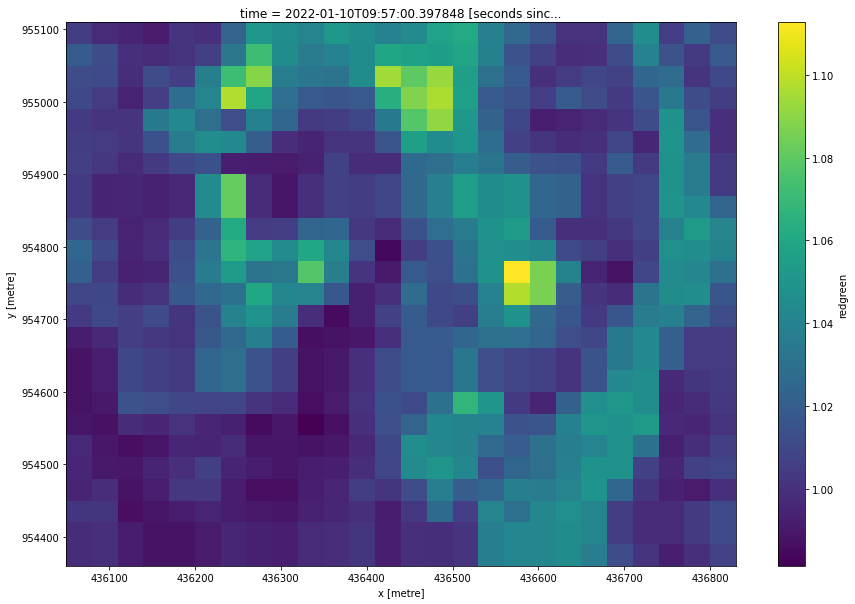

In [11]:
ds_l9.isel(time=0).redgreen.plot(size=10)

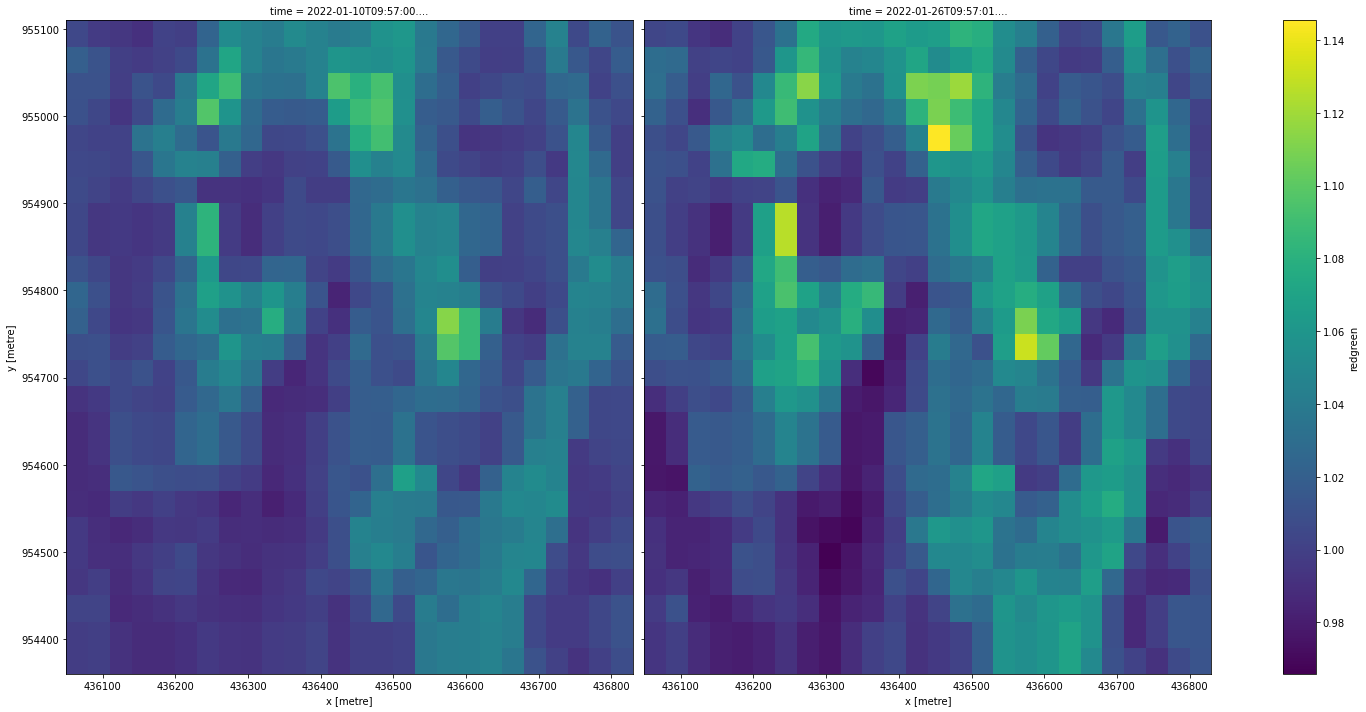

In [12]:
ds_l9.redgreen.plot(col='time',size=10)

In [13]:
from deafrica_tools.plotting import rgb

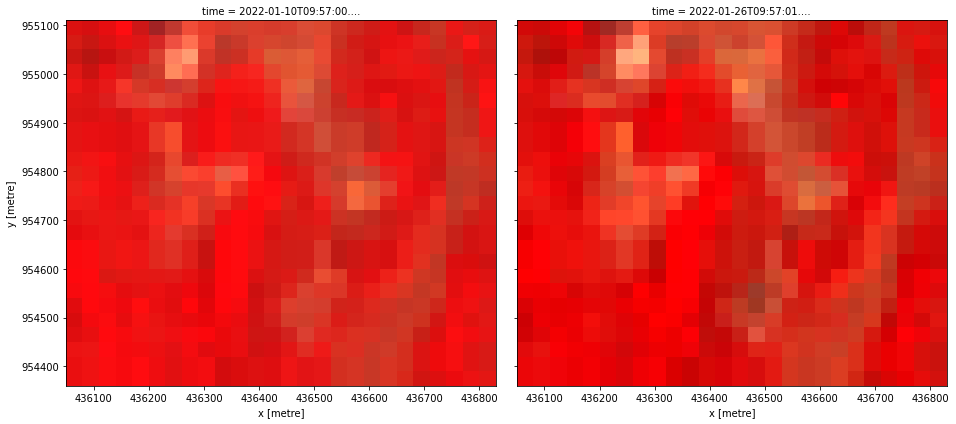

In [14]:
rgb(ds_l9, bands=['nir','red','green'], col='time')

In [15]:
ds_l9_2 = dc.load(product='ls9_sr',
        output_crs='EPSG:6933',
        x=x_range, y=y_range,
       resolution=(-30,30),
        time=('01-2022','07-2022'),
        measurements=['red','blue','green', 'nir', 'swir_1']
                 )
ds_l9_2

<xarray.Dataset>
Dimensions:      (time: 10, y: 25, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T09:57:00.397848 ... 2022-07...
  * y            (y) float64 9.551e+05 9.551e+05 ... 9.544e+05 9.544e+05
  * x            (x) float64 4.361e+05 4.361e+05 ... 4.368e+05 4.368e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 10277 10196 10171 ... 31382 31355 31200
    blue         (time, y, x) uint16 8835 8837 8827 8856 ... 33384 33416 33193
    green        (time, y, x) uint16 10229 10225 10226 ... 31996 31875 31746
    nir          (time, y, x) uint16 15868 15716 16179 ... 32868 32872 32686
    swir_1       (time, y, x) uint16 15070 14739 14264 ... 26706 26474 26288
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [16]:
ds_l9_2['ndvi'] = ((ds_l9_2['nir'] - ds_l9_2['red'])
                   /
                   (ds_l9_2['nir'] + ds_l9_2['red'])
                  )
ds_l9_2

<xarray.Dataset>
Dimensions:      (time: 10, y: 25, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T09:57:00.397848 ... 2022-07...
  * y            (y) float64 9.551e+05 9.551e+05 ... 9.544e+05 9.544e+05
  * x            (x) float64 4.361e+05 4.361e+05 ... 4.368e+05 4.368e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 10277 10196 10171 ... 31382 31355 31200
    blue         (time, y, x) uint16 8835 8837 8827 8856 ... 33384 33416 33193
    green        (time, y, x) uint16 10229 10225 10226 ... 31996 31875 31746
    nir          (time, y, x) uint16 15868 15716 16179 ... 32868 32872 32686
    swir_1       (time, y, x) uint16 15070 14739 14264 ... 26706 26474 26288
    ndvi         (time, y, x) float64 0.2138 0.213 0.228 ... 0.02362 0.02326
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [17]:
ds_l9_2['ndwi'] = ((ds_l9_2['nir'] - ds_l9_2['swir_1'])
                   /
                   (ds_l9_2['nir'] + ds_l9_2['swir_1'])
                  )
ds_l9_2

<xarray.Dataset>
Dimensions:      (time: 10, y: 25, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T09:57:00.397848 ... 2022-07...
  * y            (y) float64 9.551e+05 9.551e+05 ... 9.544e+05 9.544e+05
  * x            (x) float64 4.361e+05 4.361e+05 ... 4.368e+05 4.368e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 10277 10196 10171 ... 31382 31355 31200
    blue         (time, y, x) uint16 8835 8837 8827 8856 ... 33384 33416 33193
    green        (time, y, x) uint16 10229 10225 10226 ... 31996 31875 31746
    nir          (time, y, x) uint16 15868 15716 16179 ... 32868 32872 32686
    swir_1       (time, y, x) uint16 15070 14739 14264 ... 26706 26474 26288
    ndvi         (time, y, x) float64 0.2138 0.213 0.228 ... 0.02362 0.02326
    ndwi         (time, y, x) float64 0.02579 0.03208 0.0629 ... 0.1078 0.1085
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

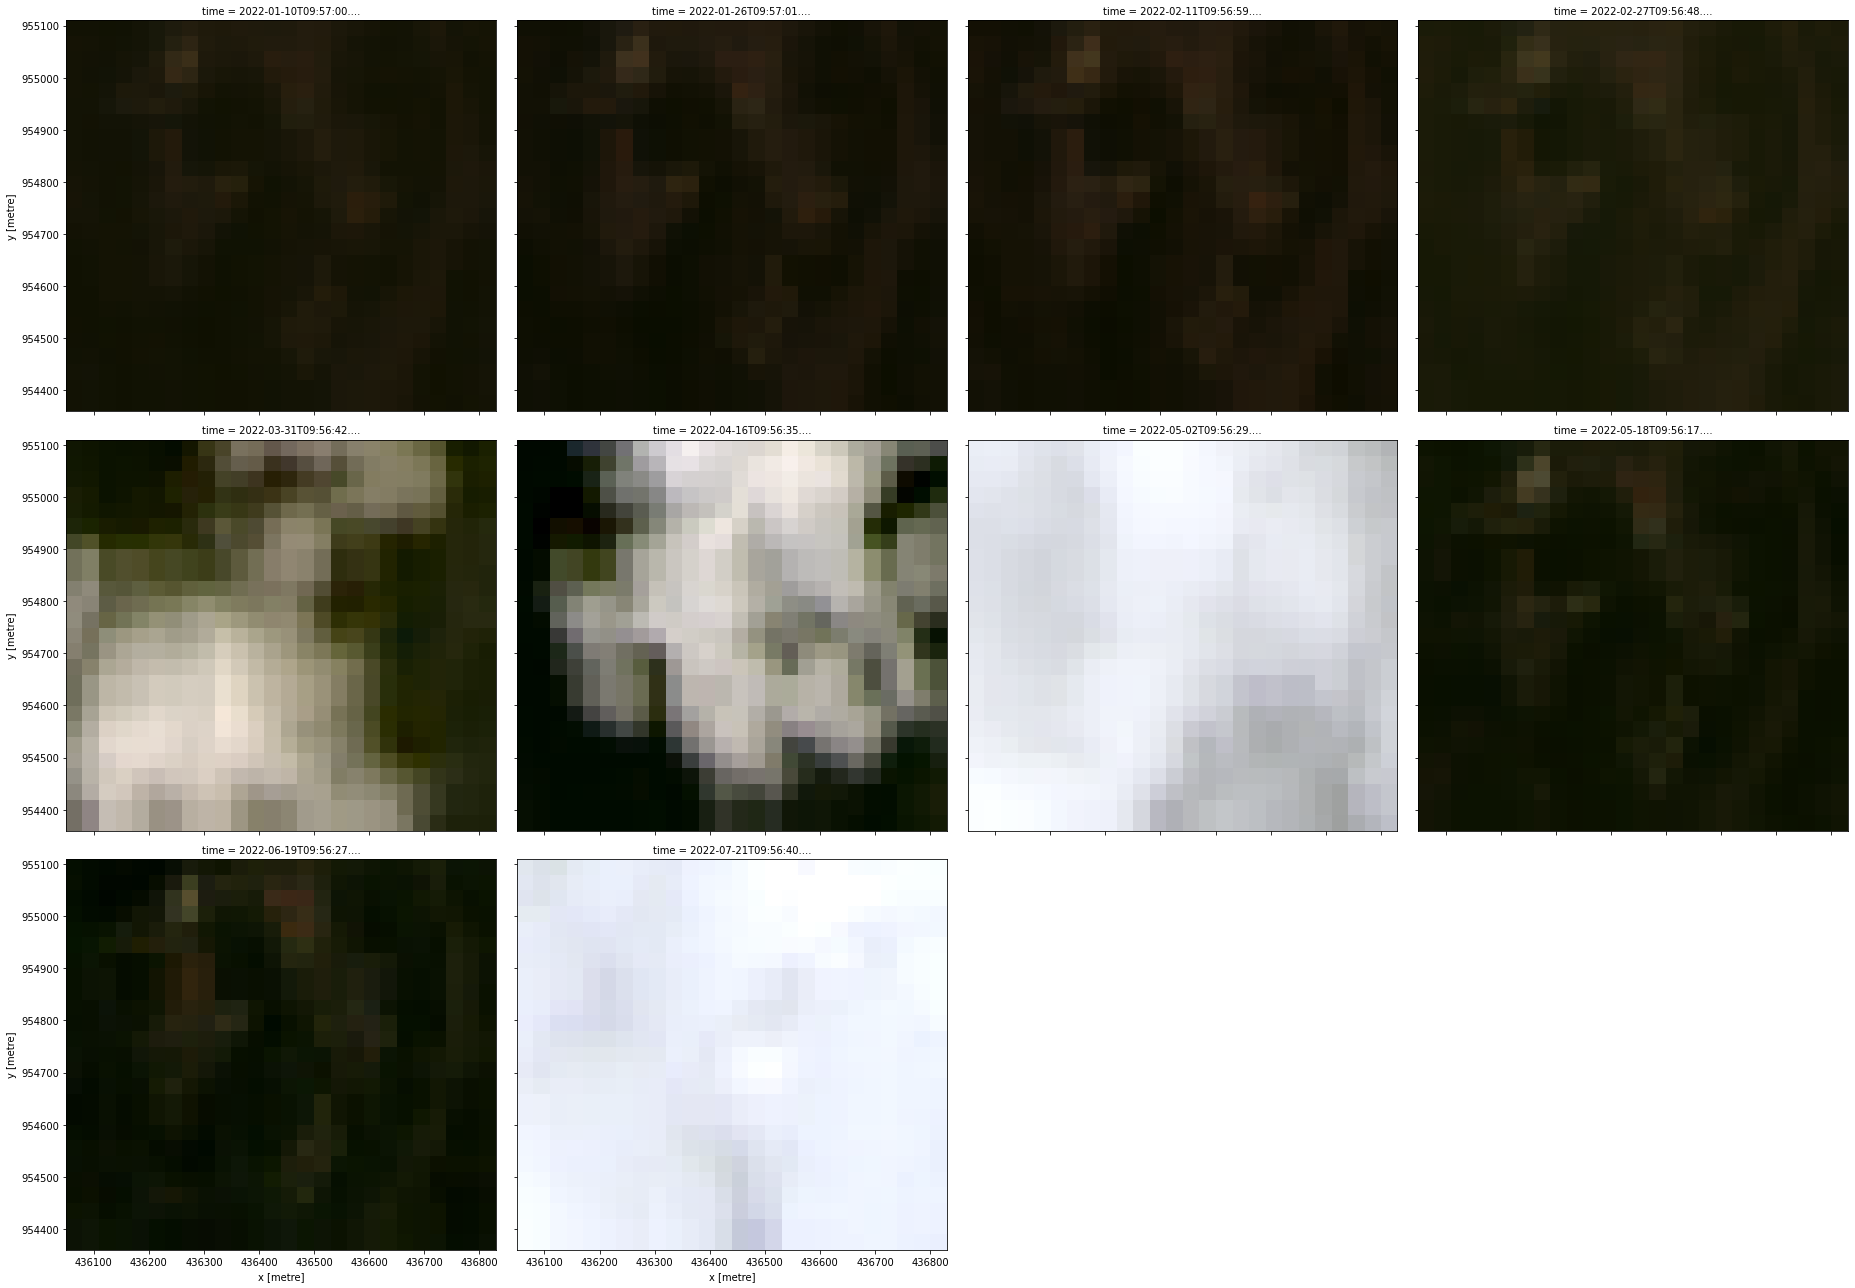

In [18]:
rgb(ds_l9_2, col='time')

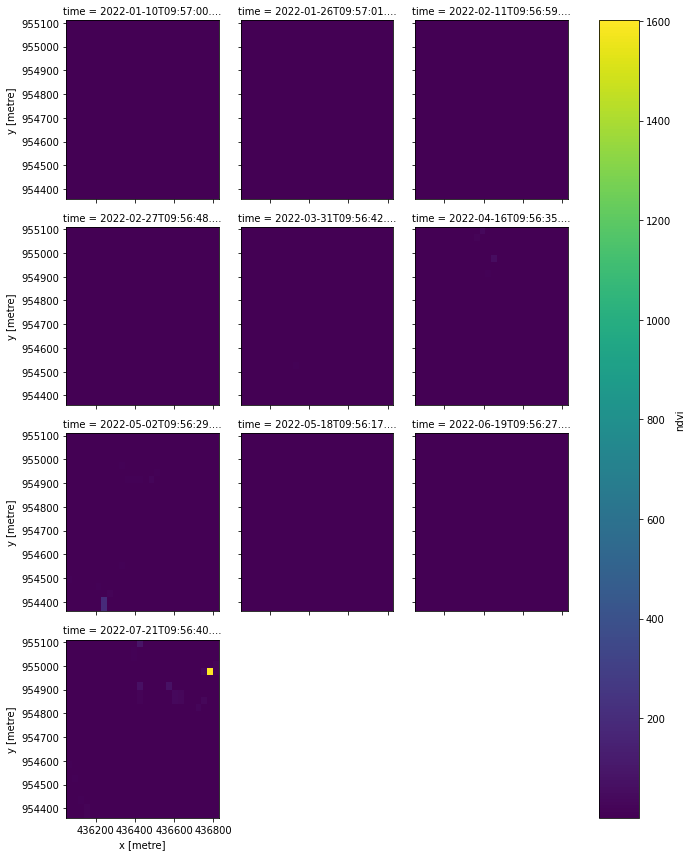

In [19]:
ds_l9_2['ndvi'].plot(col='time', col_wrap=3)

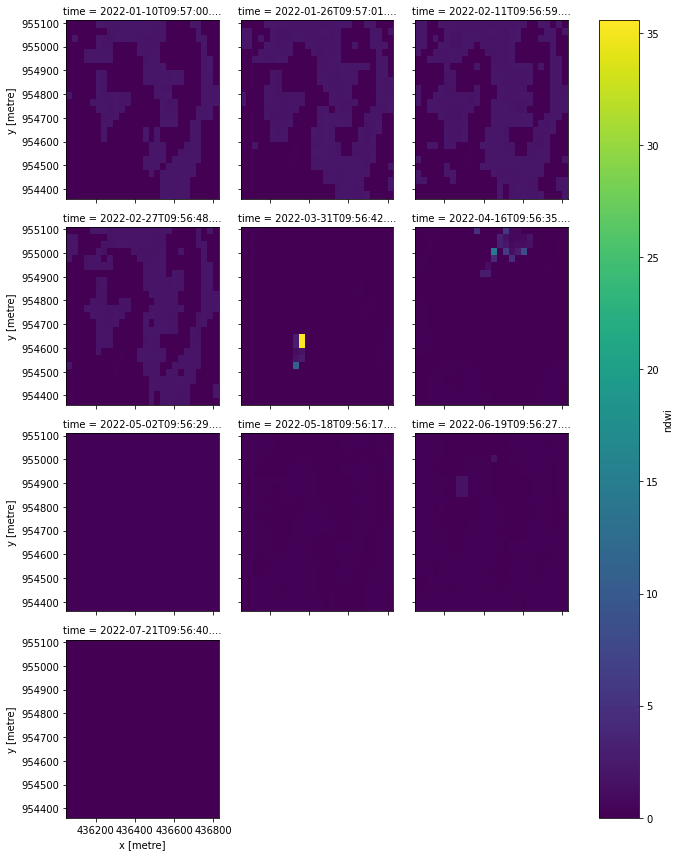

In [20]:
ds_l9_2['ndwi'].plot(col='time', col_wrap=3)

In [21]:
time_ndvi = ds_l9_2['ndvi'].std(dim=['x','y'])

In [22]:
time_ndvi.time.values

array(['2022-01-10T09:57:00.397848000', '2022-01-26T09:57:01.959321000',
       '2022-02-11T09:56:59.334134000', '2022-02-27T09:56:48.633564000',
       '2022-03-31T09:56:42.457486000', '2022-04-16T09:56:35.414308000',
       '2022-05-02T09:56:29.442524000', '2022-05-18T09:56:17.760824000',
       '2022-06-19T09:56:27.931718000', '2022-07-21T09:56:40.480152000'],
      dtype='datetime64[ns]')

In [23]:
import matplotlib.pyplot as plt

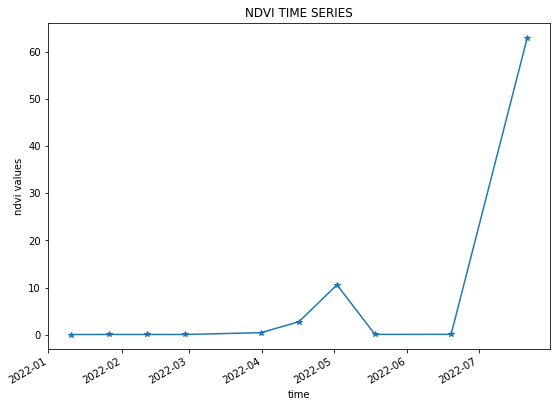

In [24]:
time_ndvi.plot(size=6, marker='*')
plt.title('NDVI TIME SERIES')
plt.ylabel('ndvi values')
plt.xlabel('time')
plt.show()

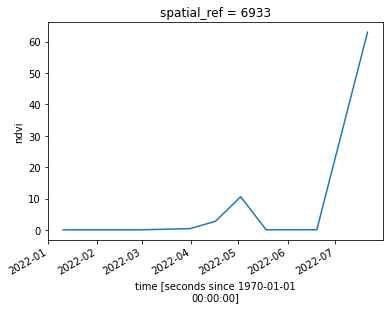

In [25]:
time_ndvi.plot()

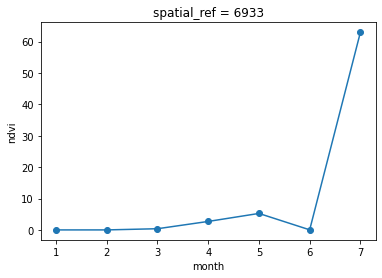

In [26]:
months = ds_l9_2['ndvi'].groupby('time.month').mean()
months = months.std(dim=['x','y'])
months.plot(marker='o')

In [27]:
from deafrica_tools.bandindices import calculate_indices

In [28]:
ds_l9_2 = calculate_indices(ds_l9_2, index=['EVI','MNDWI','BUI'], 
                  satellite_mission='ls')

In [29]:
ds_l9_2

<xarray.Dataset>
Dimensions:      (time: 10, y: 25, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T09:57:00.397848 ... 2022-07...
  * y            (y) float64 9.551e+05 9.551e+05 ... 9.544e+05 9.544e+05
  * x            (x) float64 4.361e+05 4.361e+05 ... 4.368e+05 4.368e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 10277 10196 10171 ... 31382 31355 31200
    blue         (time, y, x) uint16 8835 8837 8827 8856 ... 33384 33416 33193
    green        (time, y, x) uint16 10229 10225 10226 ... 31996 31875 31746
    nir          (time, y, x) uint16 15868 15716 16179 ... 32868 32872 32686
    swir_1       (time, y, x) uint16 15070 14739 14264 ... 26706 26474 26288
    ndvi         (time, y, x) float64 0.2138 0.213 0.228 ... 0.02362 0.02326
    ndwi         (time, y, x) float64 0.02579 0.03208 0.0629 ... 0.1078 0.1085
    EVI          (time, y, x) float64 1.24 1.3 1.365 ... -0.1271 -0.1281 -0.1278
    MNDWI        (time, y, x) float64 -0.1914 -0.1808 ... 0.09256 0.09405
    BUI          (time, y, x) float64 -0.2396 -0.2451 ... -0.1314 -0.1317
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

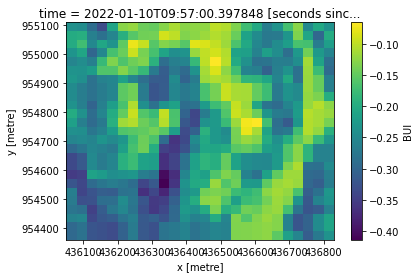

In [30]:
ds_l9_2.isel(time=0)['BUI'].plot()

In [31]:
from deafrica_tools.datahandling import load_ard

In [32]:
ds_ls_lard = load_ard(dc, 
                      products=['ls9_sr', 'ls8_sr'], 
                      min_gooddata = 1,
                      time=('01-2022','07-2022'),
                      x=x_range, y=y_range,
                      output_crs='EPSG:6933',
                      resolution=(-30,30)
                     )

Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls9_sr
    ls8_sr
Counting good quality pixels for each time step
Filtering to 8 out of 17 time steps with at least 100.0% good quality pixels
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Loading 8 time steps


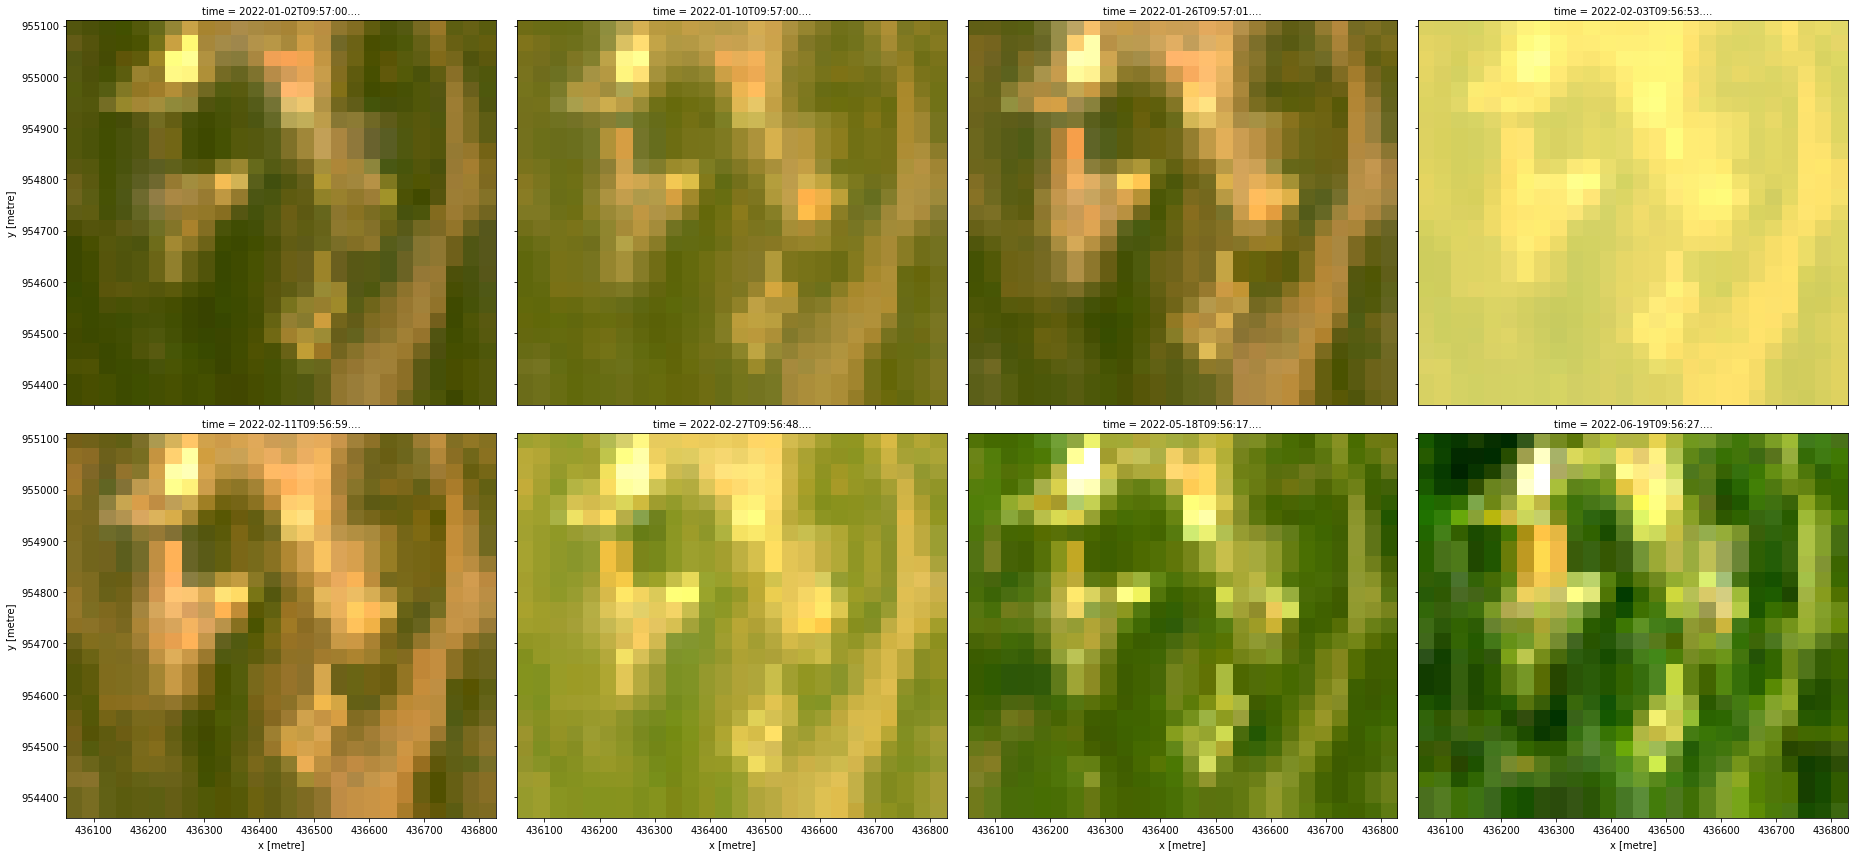

In [33]:
rgb(ds_ls_lard, col='time')

In [39]:
ds_ls_lard = calculate_indices(ds_ls_lard, index='ASI', satellite_mission='ls')

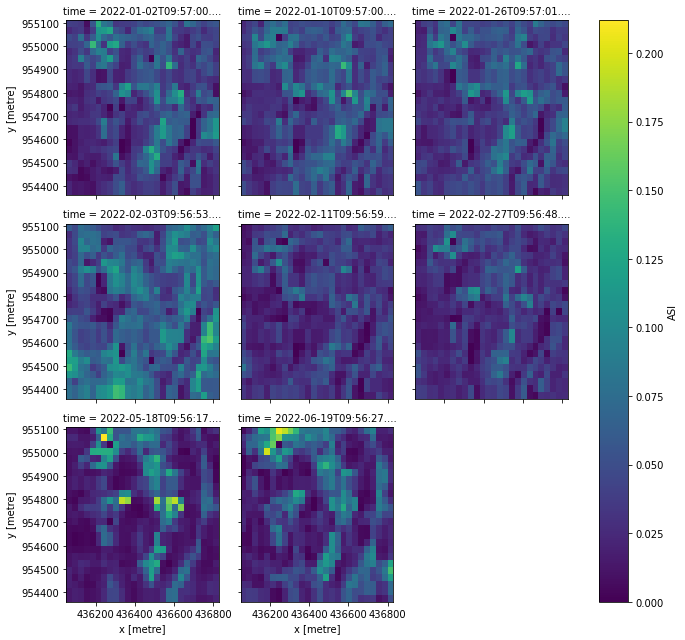

In [40]:
ds_ls_lard['ASI'].plot(col='time', col_wrap=3)

In [41]:
filtered_asi = ds_ls_lard.where(ds_ls_lard['ASI'] >= 0.1)['ASI']

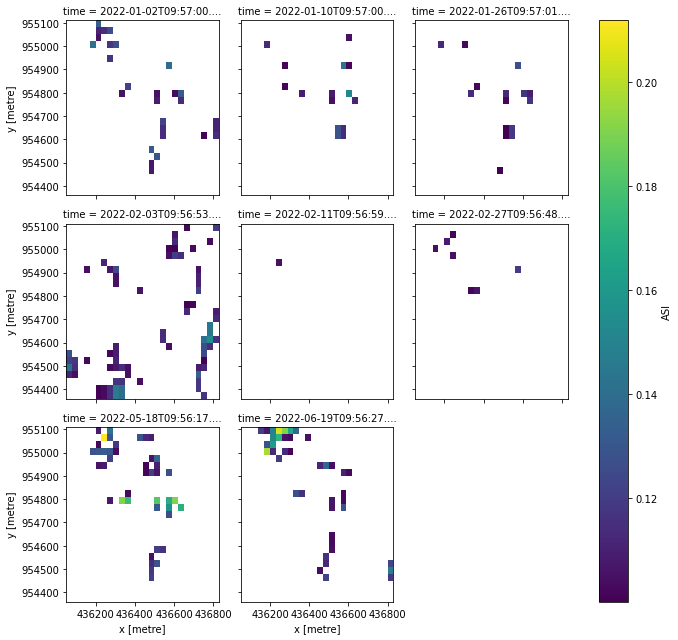

In [42]:
filtered_asi.plot(col='time', col_wrap=3)

In [38]:
ds_ls_lard = calculate_indices(ds_ls_lard, index='NDVI', satellite_mission='ls')

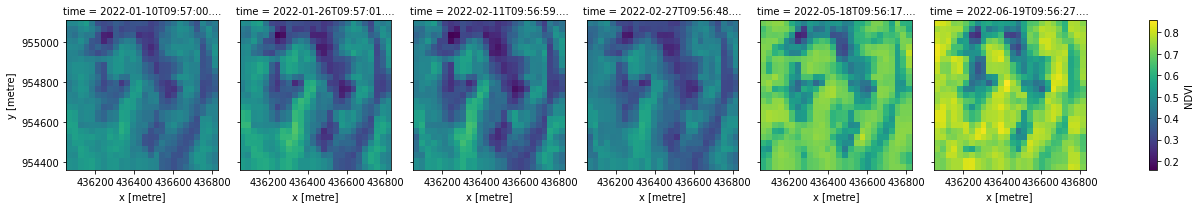

In [51]:
ds_ls_lard['NDVI'].plot(col='time')

In [43]:
filter_ndvi = ds_ls_lard.where(ds_ls_lard['NDVI'] >= 0.5)['NDVI']

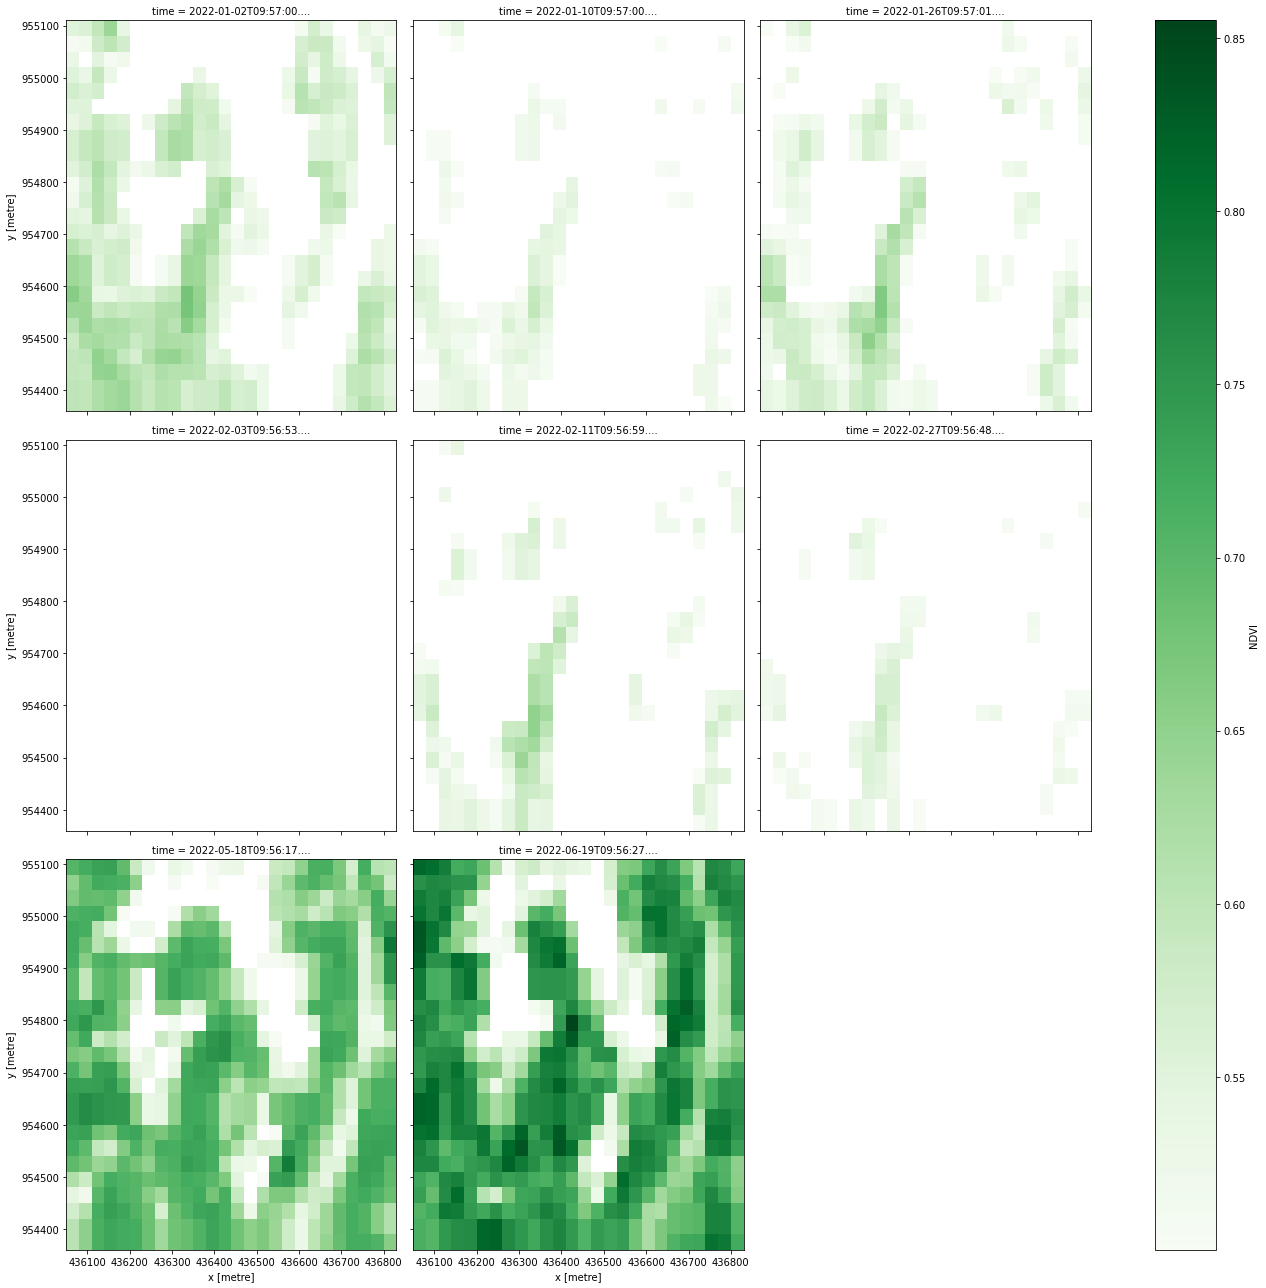

In [44]:
filter_ndvi.plot(col='time', cmap='Greens', size=6, col_wrap=3)

## Importing shapefiles

In [ ]:
import geopandas as gpd
from datacube.utils import geometry

In [ ]:
gdf  = gpd.read_file("Data/apam.geojson")
gdf.explore()

In [ ]:
geom = geometry.Geometry(gdf.unary_union, gdf.crs)

In [ ]:
ds_l9_2 = dc.load(product='ls9_sr',
        output_crs='EPSG:6933',
        geopolygon= geom,
       resolution=(-30,30),
        time=('01-2022','07-2022'),
        measurements=['red','blue','green', 'nir', 'swir_1']
                 )
ds_l9_2

In [ ]:
from deafrica_tools.spatial import xr_rasterize

In [ ]:
mask = xr_rasterize(gdf, ds_l9_2)

    # Mask dataset to set pixels outside the polygon to `NaN`
ds_l9_2 = ds_l9_2.where(mask)

In [ ]:
rgb(ds_l9_2, index=1)